In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

%config InlineBackend.figure_format = 'retina'

### Importing Data

In [2]:
circuits = pd.read_csv('./data/circuits.csv')
constructor_results = pd.read_csv('./data/constructor_results.csv')
constructor_standings = pd.read_csv('./data/constructor_standings.csv')
constructors = pd.read_csv('./data/constructors.csv')
driver_standings = pd.read_csv('./data/driver_standings.csv')
drivers = pd.read_csv('./data/drivers.csv')
lap_times = pd.read_csv('./data/lap_times.csv')
pit_stops = pd.read_csv('./data/pit_stops.csv')
qualifying = pd.read_csv('./data/qualifying.csv')
races = pd.read_csv('./data/races.csv')
results = pd.read_csv('./data/results.csv')
seasons = pd.read_csv('./data/seasons.csv')
sprint_results = pd.read_csv('./data/sprint_results.csv')
status = pd.read_csv('./data/status.csv')

### Looking at csv

We now look at each file one by one and see what data we have and what insights we can derive from it.

#### Circuits

This dataframe contains circuit details

In [3]:
circuits.head()

circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4         http://en.wikipedia.org/wiki/Istanbul_Park

In [4]:
print(f'Total F1 circuits - {circuits.shape[0]}')

Total F1 circuits - 76


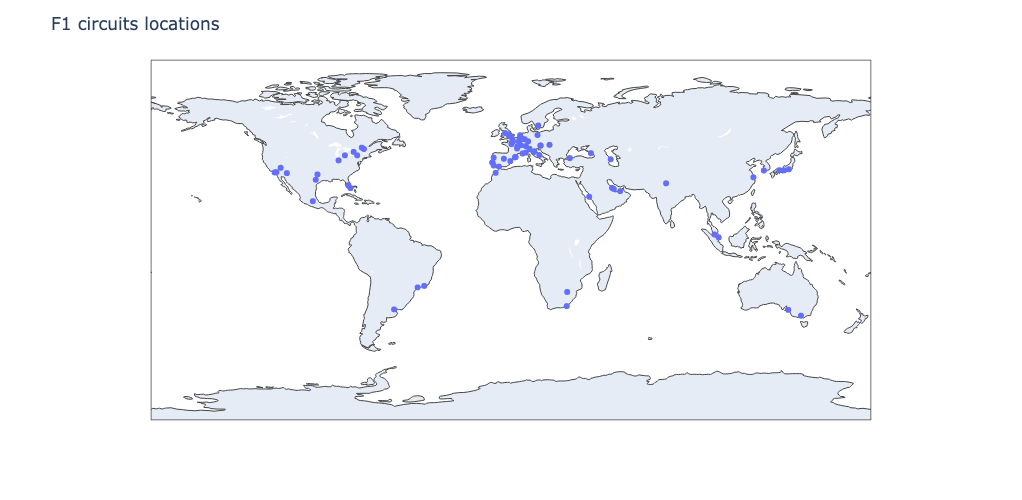

In [5]:
fig2 = fig = px.scatter_geo(circuits, lat=circuits.lat, lon=circuits.lng, 
                            hover_name=circuits.name, width=1000, height=500)
fig2.update_layout(
    title = 'F1 circuits locations',
    geo_scope='world',
)

#### Constructor Standings

These dataframe has team standings for constructor championships.

In [6]:
constructor_results.head()

constructorResultsId  raceId  constructorId  points status
0                     1      18              1    14.0     \N
1                     2      18              2     8.0     \N
2                     3      18              3     9.0     \N
3                     4      18              4     5.0     \N
4                     5      18              5     2.0     \N

In [7]:
constructor_standings.head()

constructorStandingsId  raceId  constructorId  points  position  \
0                       1      18              1    14.0         1   
1                       2      18              2     8.0         3   
2                       3      18              3     9.0         2   
3                       4      18              4     5.0         4   
4                       5      18              5     2.0         5   

  positionText  wins  
0            1     1  
1            3     0  
2            2     0  
3            4     0  
4            5     0

In [8]:
constructors.head()

constructorId constructorRef        name nationality  \
0              1        mclaren     McLaren     British   
1              2     bmw_sauber  BMW Sauber      German   
2              3       williams    Williams     British   
3              4        renault     Renault      French   
4              5     toro_rosso  Toro Rosso     Italian   

                                                 url  
0               http://en.wikipedia.org/wiki/McLaren  
1            http://en.wikipedia.org/wiki/BMW_Sauber  
2  http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3  http://en.wikipedia.org/wiki/Renault_in_Formul...  
4   http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso

In [32]:
cons_df = pd.merge(constructors, constructor_standings, how='inner', on='constructorId')
cons_df = pd.merge(cons_df, constructor_results, how='inner', on='constructorId')
cons_df = cons_df.drop(columns=['constructorRef', 'url', 'status'], axis=1)
cons_df.head()

constructorId     name nationality  constructorStandingsId  raceId_x  \
0              1  McLaren     British                       1        18   
1              1  McLaren     British                       1        18   
2              1  McLaren     British                       1        18   
3              1  McLaren     British                       1        18   
4              1  McLaren     British                       1        18   

   points_x  position positionText  wins  constructorResultsId  raceId_y  \
0      14.0         1            1     1                     1        18   
1      14.0         1            1     1                    14        19   
2      14.0         1            1     1                    25        20   
3      14.0         1            1     1                    35        21   
4      14.0         1            1     1                    46        22   

   points_y  
0      14.0  
1      10.0  
2       4.0  
3       6.0  
4       8.0

#### Total wins per constructor

More to do

In [48]:
cons_df = cons_df.groupby(['name']).sum(numeric_only=True)
cons_df = cons_df[cons_df['wins']>0]
cons_df = cons_df.reset_index()
cons_df.head()

name  constructorId  constructorStandingsId  raceId_x   points_x  \
0      AlphaTauri         575952                75259964   2863172   133380.0   
1  Alpine F1 Team         262150                34249635   1308930    74515.0   
2      BMW Sauber           9940                50103351    176435   208172.0   
3             BRM        3049200               976540800  30447800   476600.0   
4        Benetton        1481480               545609220  18530980  1910870.0   

   position   wins  constructorResultsId  raceId_y  points_y  
0     17472    520              44128708   2863172   14352.0  
1      6755    420              20095425   1308930    8890.0  
2     20945    852               6200390    182630   21560.0  
3    313400  19600             527542323  30821637  101409.0  
4    257400  57200             198392187  18530414  223128.5

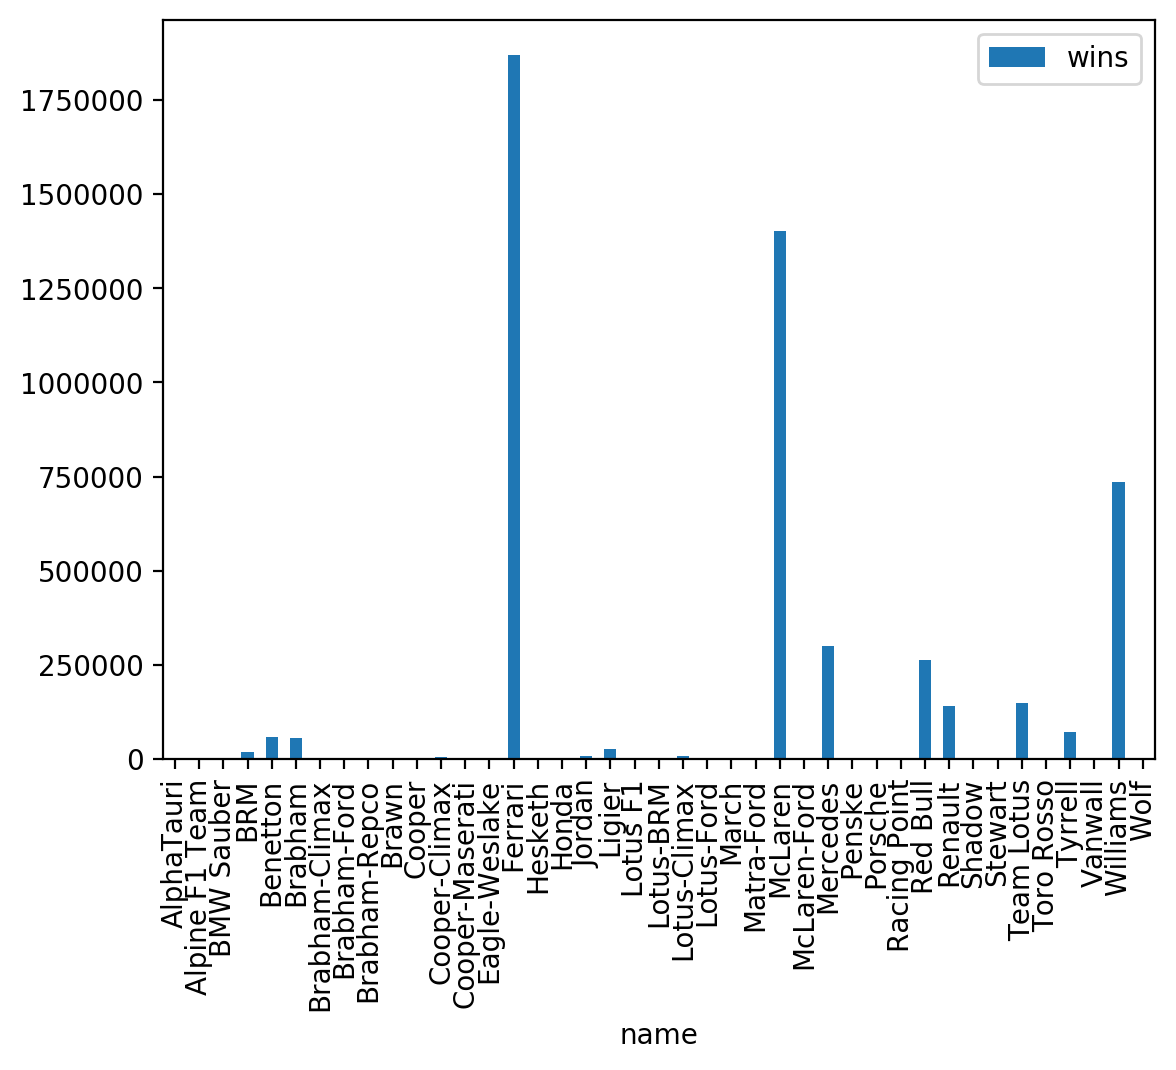

In [49]:
cons_df.plot.bar(x='name', y='wins')

#### Driver standings

In [50]:
drivers_df = pd.merge(drivers, driver_standings, how='inner', on='driverId')
drivers_df = drivers_df.drop(columns=['driverRef', 'url'], axis=1)
drivers_df.head()

driverId number code forename   surname         dob nationality  \
0         1     44  HAM    Lewis  Hamilton  1985-01-07     British   
1         1     44  HAM    Lewis  Hamilton  1985-01-07     British   
2         1     44  HAM    Lewis  Hamilton  1985-01-07     British   
3         1     44  HAM    Lewis  Hamilton  1985-01-07     British   
4         1     44  HAM    Lewis  Hamilton  1985-01-07     British   

   driverStandingsId  raceId  points  position positionText  wins  
0                  1      18    10.0         1            1     1  
1                  9      19    14.0         1            1     1  
2                 27      20    14.0         3            3     1  
3                 48      21    20.0         2            2     1  
4                 69      22    28.0         3            3     1

In [57]:
drivers_df = drivers_df.groupby(['surname']).sum(numeric_only=True)
drivers_df = drivers_df[drivers_df['wins']>25]
drivers_df = drivers_df.reset_index()
drivers_df.head()

surname  driverId  driverStandingsId  raceId   points  position  wins
0  Alboreto     22890            4725747   82558   1659.5      2987    44
1    Alonso      1404           16945974  199359  20005.0      2654   346
2  Andretti     37056            8828809  100182   1643.0      2385   107
3    Arnoux     29992            5436324   82520   1463.0      2579    51
4    Ascari     27821            1961233   35094    523.0       786    54

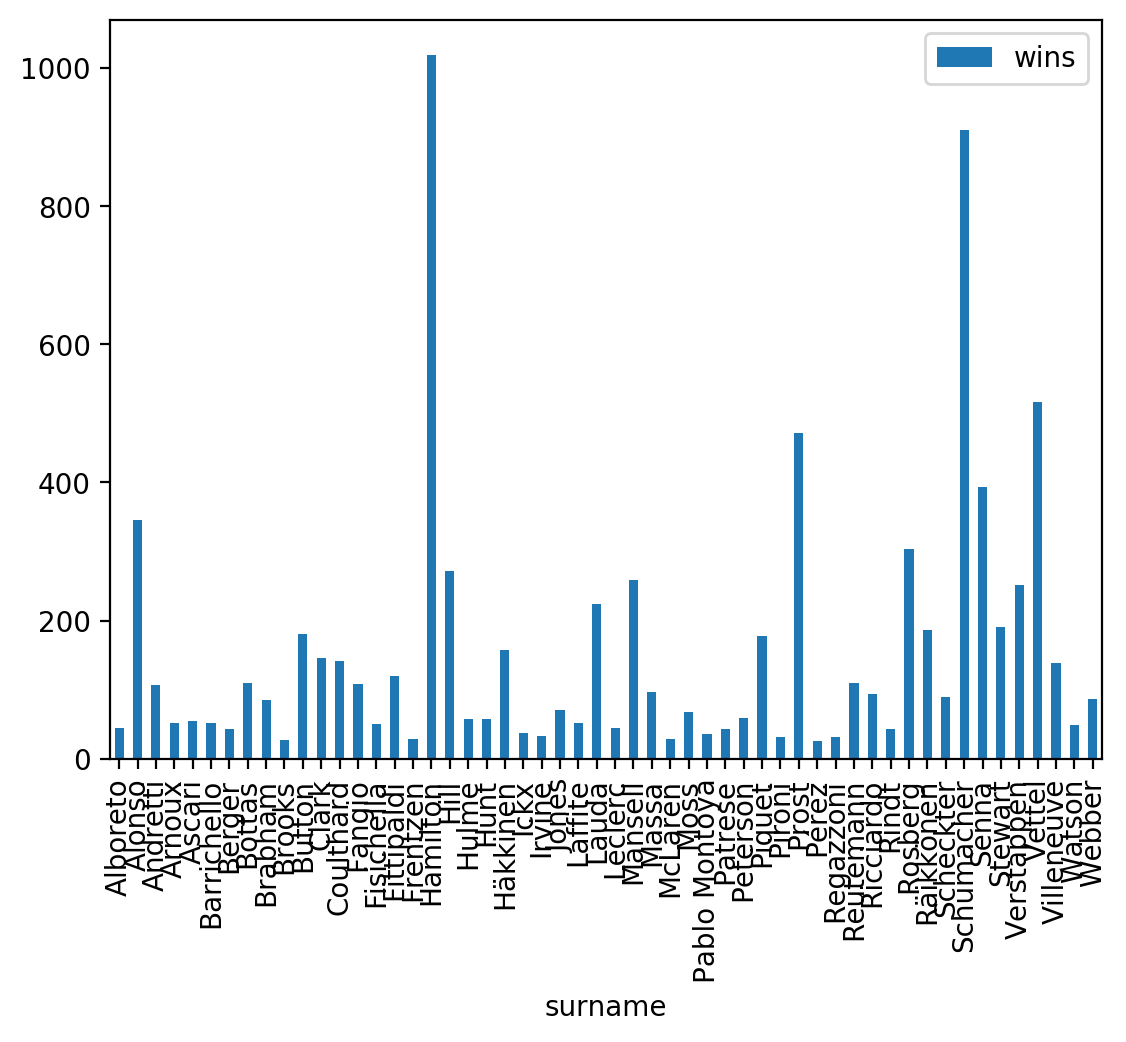

In [58]:
drivers_df.plot.bar(x='surname', y='wins')

In [61]:
results.head()

resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300         1  
1         41    3       1:27.739         217.586         1  
2         41    5       1:28.090         216.719         1  
3         58    7       1:28.603         215.464         1  
4         43    1       1:27.418         218.385         1